In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('hotel_booking.csv')

# Exploratory Data Analysis and Data cleaning

In [6]:
df.head() # select 5 col

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [8]:
df.shape

(119390, 36)

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [10]:
df.info() #to check the datatypes of the columns
#object datatypes are the categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df.drop(['name', 'email', 'phone-number', 'credit_card'],axis=1, inplace=True) #to delete the col

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date']) 
#to change the datatype of "reservation_status_date" from "objects" to "datetime"

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [16]:
df.describe() #isme sirf numerical columns hi dikhate h

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [17]:
df.describe(include= 'object') #isme sirf "object" datatype k overview miljayenge

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [18]:
#to check ki un objects ke categories m kya kya values h
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [19]:
pd.isnull(df).sum() #to check the count of all the null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [20]:
df.drop(['agent','company'],axis=1,inplace=True) #remove the entire col

In [21]:
df.dropna(inplace= True) #remove the rows which have missing values in its col(country, children)

In [22]:
pd.isnull(df).sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [23]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


# removing the outliers

<Axes: >

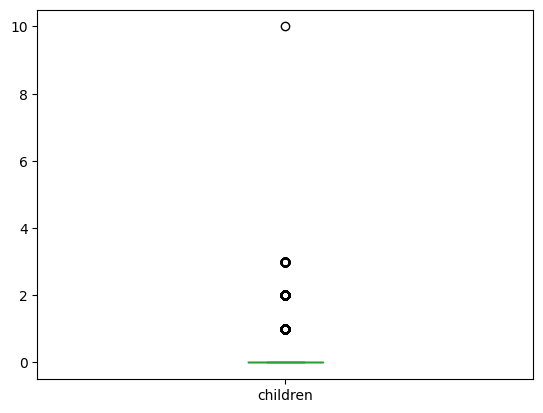

In [24]:
df['children'].plot(kind='box') #outliers in children col

In [25]:
df=df[df['children']<6] #removing the outlier

<Axes: >

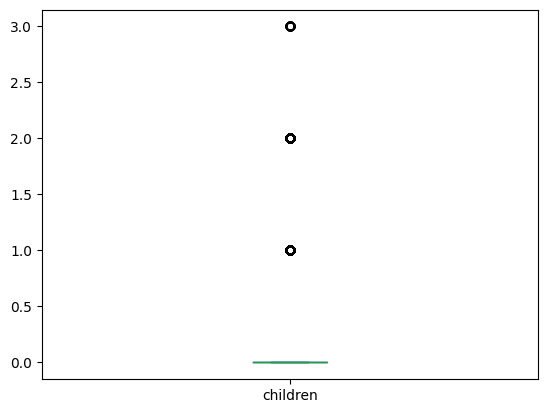

In [26]:
df['children'].plot(kind='box') #checking after removing
  

<Axes: >

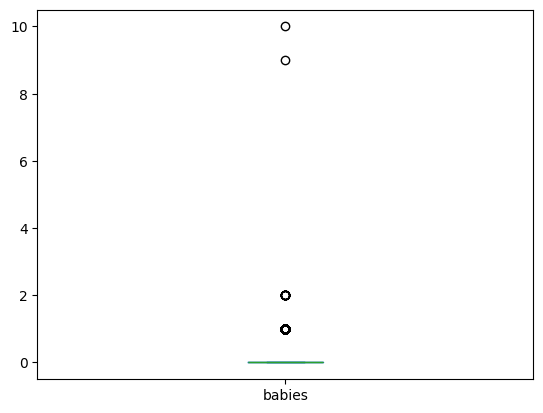

In [27]:
df['babies'].plot(kind='box') #outliers in babies
  

In [28]:
df=df[df['babies']<8] #removing

<Axes: >

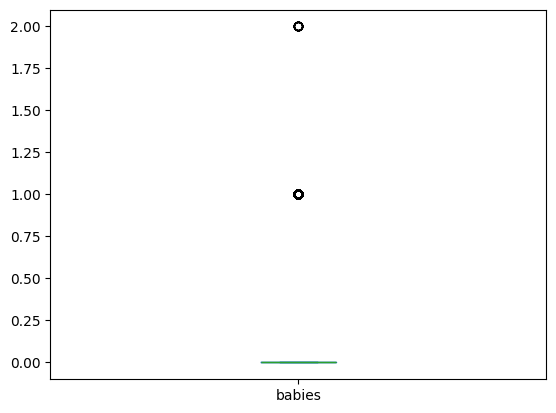

In [29]:
df['babies'].plot(kind='box') #checking after removing


<Axes: >

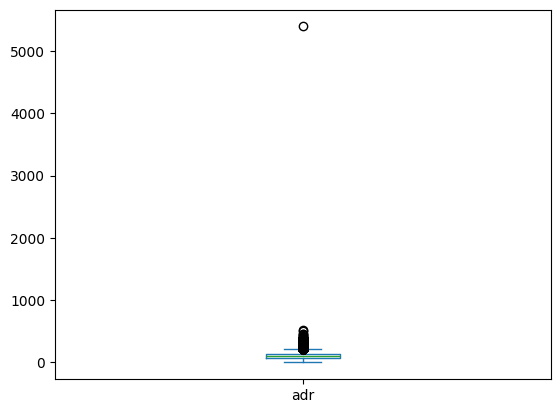

In [30]:
df['adr'].plot(kind='box') #outliers in adr(avg daily rate)


In [31]:
df=df[df['adr']<5000] #removing value above 5000
df=df[df['adr']>0] #removing value below 0

<Axes: >

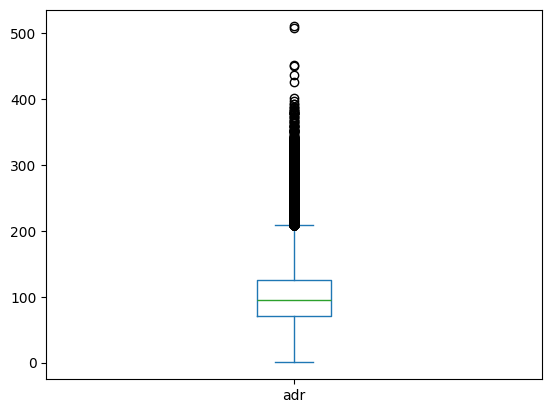

In [32]:
df['adr'].plot(kind='box') #checking after removing

In [33]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955.000000,116955
mean,0.375768,105.378701,2016.161464,27.138173,15.805156,0.937660,2.522928,1.862443,0.104741,0.007704,0.027959,0.086965,0.119798,0.216476,2.347433,103.649056,0.061998,0.571271,2016-07-31 01:34:38.737976320
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,709.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,2.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.484323,106.945084,0.706501,13.561081,8.783137,0.993293,1.885466,0.481128,0.399254,0.088792,0.164857,0.850197,1.432453,0.633547,17.712285,46.646932,0.244429,0.791501,NaN


# Data Analysis and Visualization


In [34]:
count_canceled= df['is_canceled'].value_counts() #to count the total number of not canceled n canceled
print(count_canceled)

is_canceled
0    73007
1    43948
Name: count, dtype: int64


In [35]:
perc_canceled=df['is_canceled'].value_counts(normalize=True) #to find the percentage of cacelation
print(perc_canceled)

is_canceled
0    0.624232
1    0.375768
Name: proportion, dtype: float64


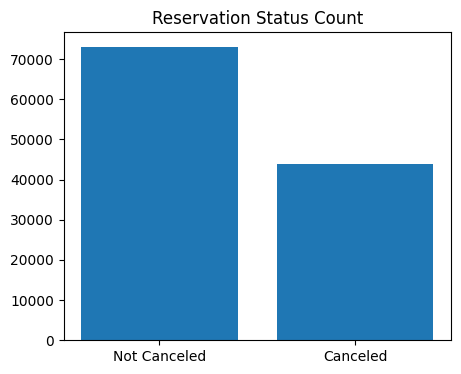

In [36]:
plt.figure(figsize=(5,4))
plt.title("Reservation Status Count")
plt.bar(['Not Canceled', 'Canceled'],count_canceled)
plt.show()

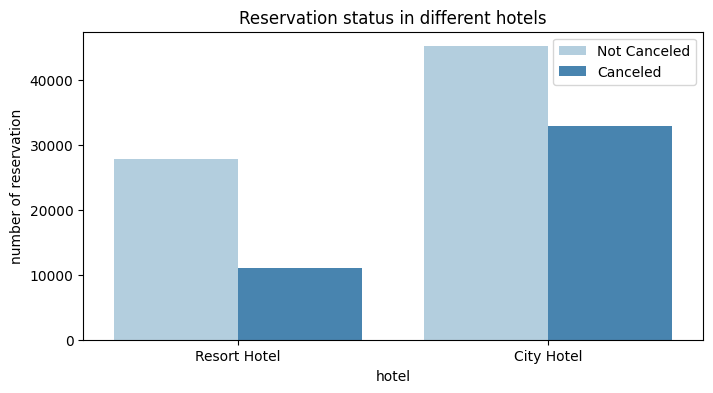

In [37]:
plt.figure(figsize=(8,4))
ax1= sns.countplot(x='hotel',hue='is_canceled',data=df, palette='Blues')
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels')
plt.xlabel('hotel')
plt.ylabel('number of reservation')
ax1.legend(['Not Canceled', 'Canceled'])
plt.show()

In [38]:
#to find the % count of tickets canceled in Resort hotels
resort_hotel= df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.717058
1    0.282942
Name: proportion, dtype: float64

In [39]:
#to find the % count of tickets canceled in City hotels
city_hotel= df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.578048
1    0.421952
Name: proportion, dtype: float64

In [40]:
#to check if there is any affect of price(adr) on the hotels(resort n city)
resort_hotel=resort_hotel.groupby('reservation_status_date')['adr'].mean().reset_index()
city_hotel= city_hotel.groupby('reservation_status_date')['adr'].mean().reset_index()

#you use reset_index() when you want to reset the index of a DataFrame after performing a groupby operation
#that introduces a new index. If the groupby operation doesn't introduce a new index or if you're fine with the index
#being the result of the aggregation, then you may not need to use reset_index().

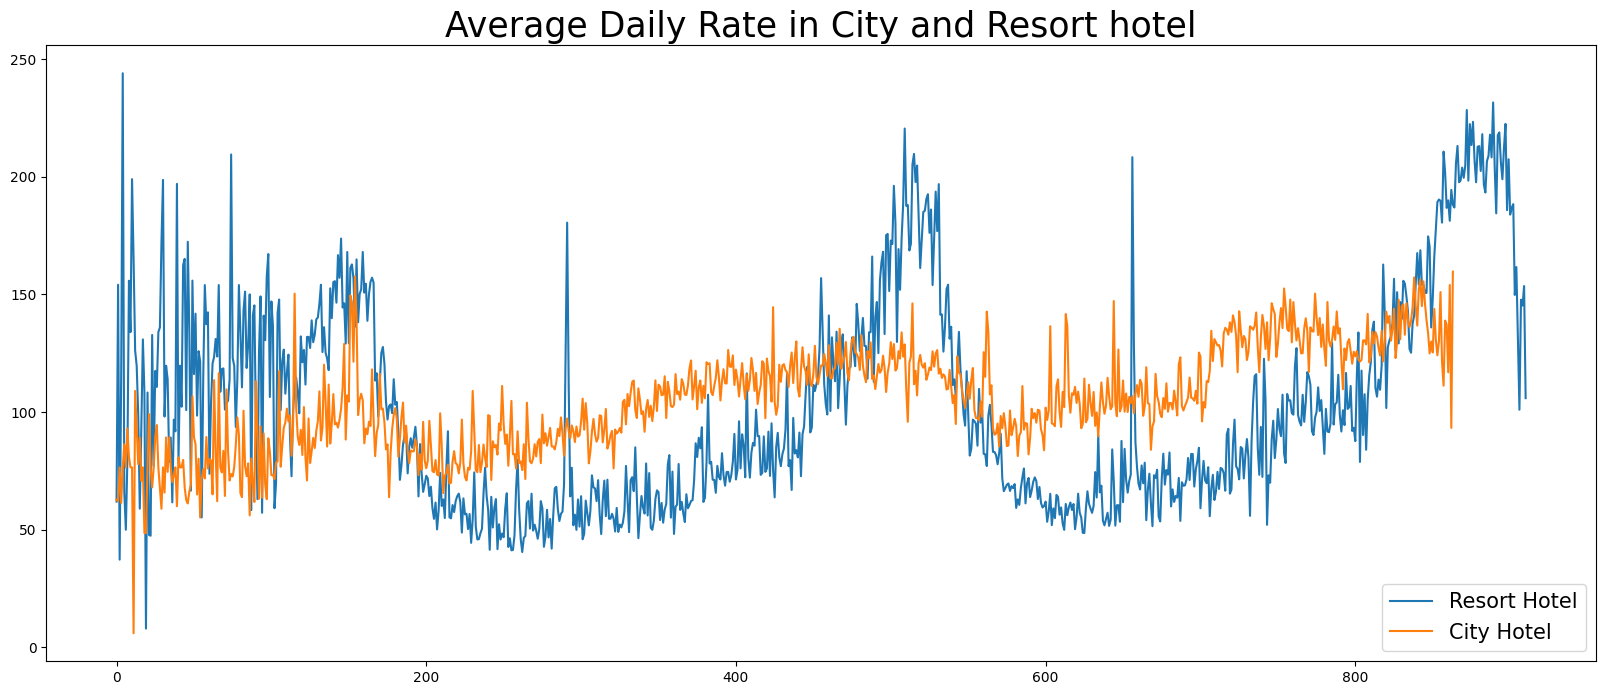

In [41]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort hotel', fontsize=25)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize=15)
plt.show()


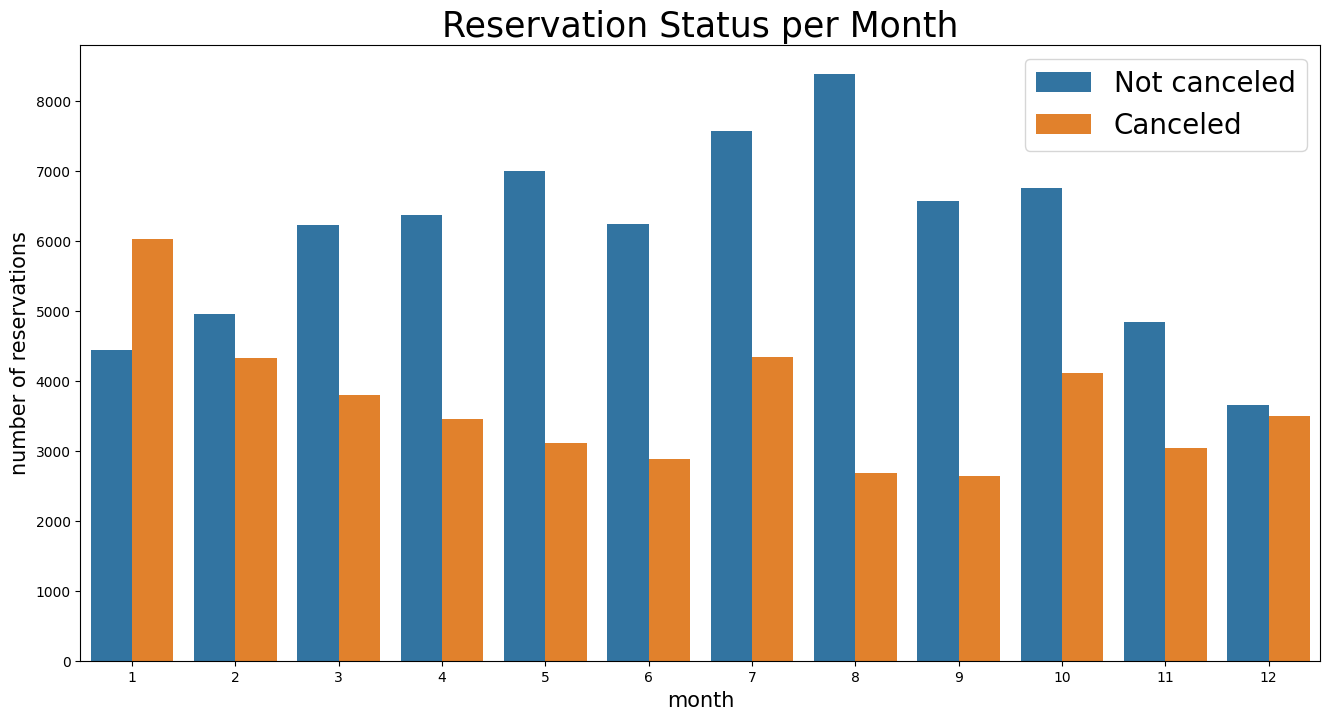

In [42]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month', hue='is_canceled', data=df)
ax1.legend(bbox_to_anchor=(1,1))
plt.legend(['Not canceled', 'Canceled'], fontsize= 20)
plt.title('Reservation Status per Month', fontsize=25)
plt.xlabel('month', fontsize= 15)
plt.ylabel('number of reservations', fontsize=15)
plt.show()

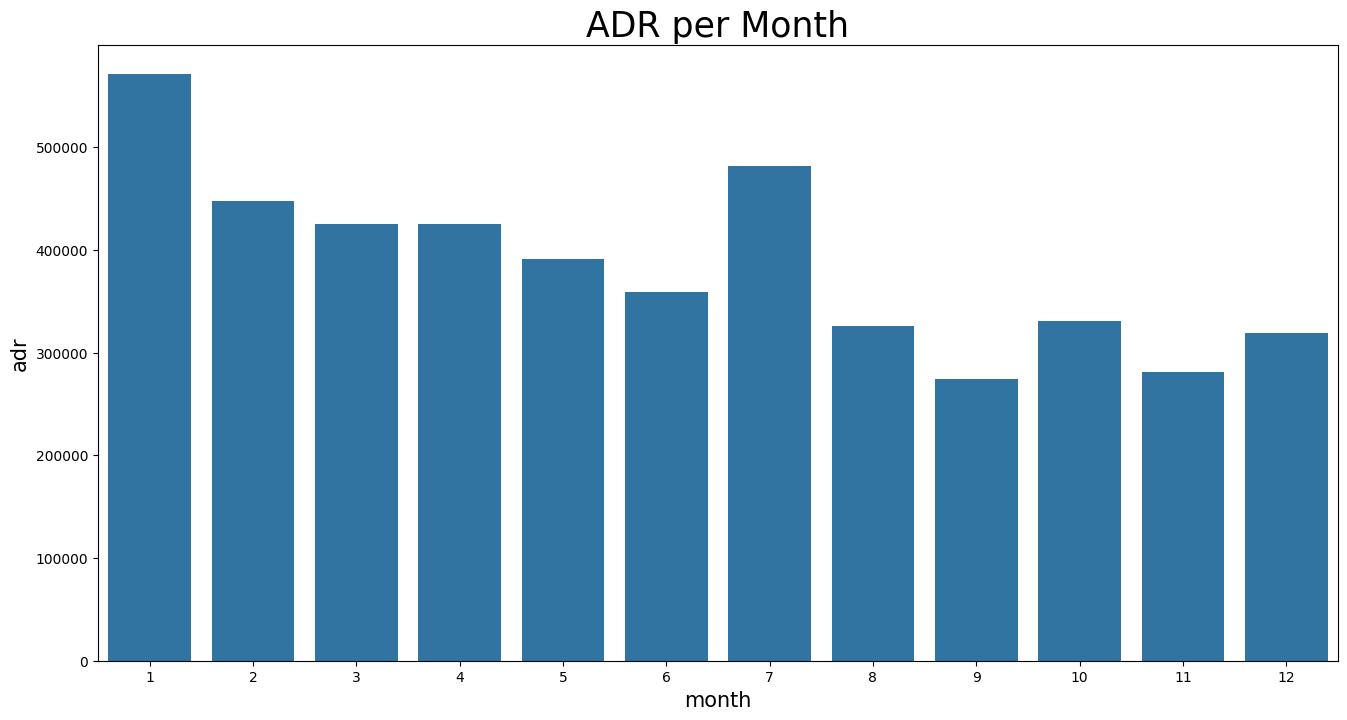

In [43]:
plt.figure(figsize=(16,8))
plt.title('ADR per Month', fontsize=25)
sns.barplot(x='month', y='adr', data=df[df['is_canceled']==1].groupby('month')['adr'].sum().reset_index())
plt.xlabel('month', fontsize=15)
plt.ylabel('adr', fontsize=15)
plt.show()

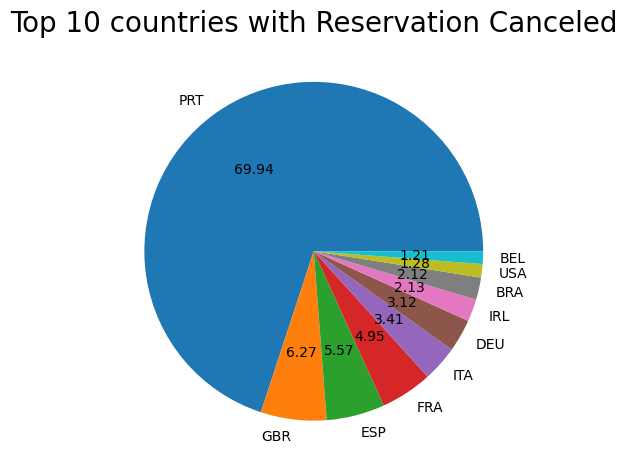

In [44]:
canceled_data= df[df['is_canceled']==1]
top_10_countries=canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(5.5,5.5))
plt.title('Top 10 countries with Reservation Canceled', fontsize=20)
plt.pie(top_10_countries, autopct='%.2f', labels=top_10_countries.index)
plt.show()

In [45]:
df['market_segment'].value_counts()

market_segment
Online TA        56035
Offline TA/TO    23828
Groups           19554
Direct           12210
Corporate         5034
Aviation           231
Complementary       63
Name: count, dtype: int64

In [46]:
df['market_segment'].value_counts(normalize= True)


market_segment
Online TA        0.479116
Offline TA/TO    0.203736
Groups           0.167193
Direct           0.104399
Corporate        0.043042
Aviation         0.001975
Complementary    0.000539
Name: proportion, dtype: float64

In [47]:
canceled_data['market_segment'].value_counts(normalize= True)

market_segment
Online TA        0.471421
Groups           0.274711
Offline TA/TO    0.187449
Direct           0.042983
Corporate        0.022163
Aviation         0.001160
Complementary    0.000114
Name: proportion, dtype: float64

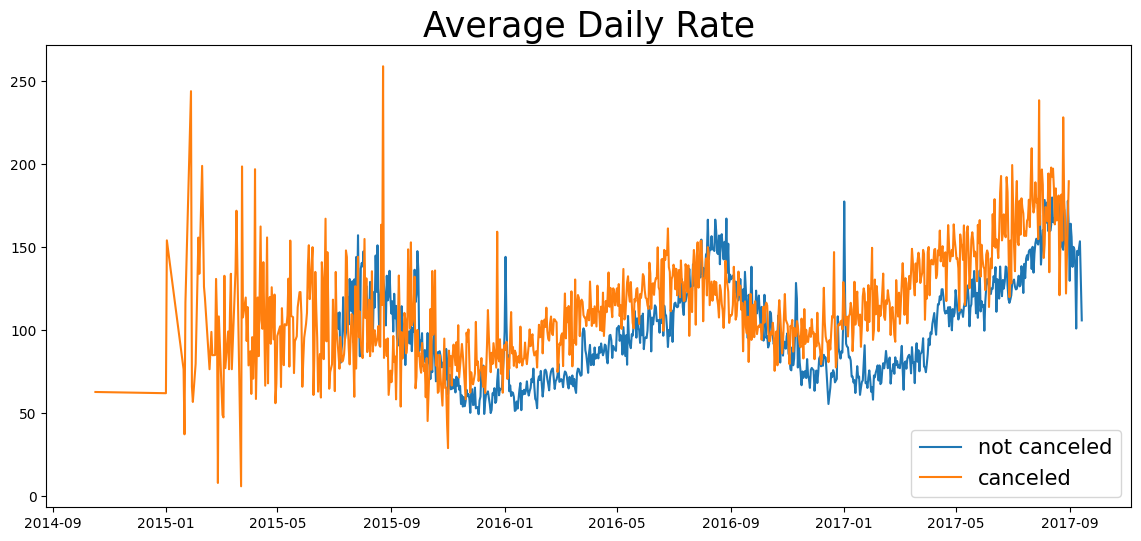

In [48]:
canceled_data_adr= canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_data_adr.reset_index(inplace= True)
canceled_data_adr.sort_values('reservation_status_date', inplace= True)

not_canceled_data= df[df['is_canceled']==0]
not_canceled_data_adr= not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_data_adr.reset_index(inplace= True)
not_canceled_data_adr.sort_values('reservation_status_date', inplace= True)

plt.figure(figsize=(14,6))
plt.title('Average Daily Rate', fontsize=25)
plt.plot(not_canceled_data_adr['reservation_status_date'], not_canceled_data_adr['adr'], label= 'not canceled')
plt.plot(canceled_data_adr['reservation_status_date'], canceled_data_adr['adr'], label='canceled')
plt.legend(fontsize=15)
plt.show()

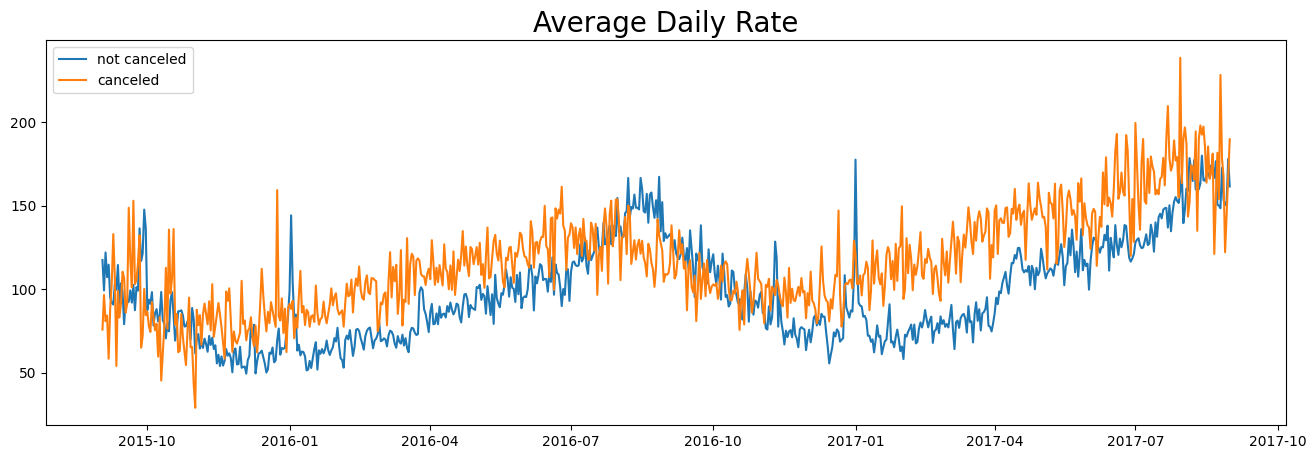

In [49]:
canceled_data_adr= canceled_data_adr[(canceled_data_adr['reservation_status_date']>'2015-09') & (canceled_data_adr['reservation_status_date']<'2017-09')]
not_canceled_data_adr= not_canceled_data_adr[(not_canceled_data_adr['reservation_status_date']>'2015-09') & (not_canceled_data_adr['reservation_status_date']<'2017-09')]

plt.figure(figsize=(16,5))
plt.title('Average Daily Rate', fontsize= 20)
plt.plot(not_canceled_data_adr['reservation_status_date'], not_canceled_data_adr['adr'], label= 'not canceled')
plt.plot(canceled_data_adr['reservation_status_date'], canceled_data_adr['adr'], label='canceled')
plt.legend()
plt.show()